# Homework 2 (Due Sep. 27) 
###### Brian Stampe
###### 790 586 017
Problems marked with a (\*) are only required for graduate students.  Undergrads may undertake them for extra credit worth half the problems point value, with no penalties incurred for an incorrect answer.

## 1. Bayesian Networks/Conditional Probability

Consider three binary variables $a, b, c \in \{0, 1\}$ having the joint distribution given by  

In [2]:
import numpy as np
#        | a | b | c | P(a,b,c)
P_table = (
np.array([[0,  0,  0,  0.192 ],
          [0,  0,  1,  0.144 ],
          [0,  1,  0,  0.048 ],
          [0,  1,  1,  0.216 ],
          [1,  0,  0,  0.192 ],
          [1,  0,  1,  0.064 ],
          [1,  1,  0,  0.048 ],
          [1,  1,  1,  0.096 ]]))

# Convert P_table (which is a probability table) to a probability array, which 
# is much more computationally sensible for a discrete valued distribution
add = 0
P_abc = np.zeros((2,2,2))
for entry in P_table:
    a = int(entry[0])
    b = int(entry[1])
    c = int(entry[2])
    P = entry[3]
    P_abc[a,b,c] = P
    #print (P)
    #add += P
    #print (add)
    
#print (P_table)

print (P_abc)
print (' ')
print (np.sum(P_abc,axis=0, keepdims=False))

[[[0.192 0.144]
  [0.048 0.216]]

 [[0.192 0.064]
  [0.048 0.096]]]
 
[[0.384 0.208]
 [0.096 0.312]]


Note that you may want to use the following functions to help you in the following problem:

In [3]:
def marginalize(P,variables_to_marginalize=(),keepdims=True):
    """ Marginalize a probability table, i.e. compute P(a,b) = sum_c P(a,b,c) 
    
        Arguments: 
        
        P (array) -> a probability array in which the dimensions correspond to random variables,
                     the indices to variable values, and the entries to probabilities
        variables_to_marginalize (tuple) -> a list of integers containing the 
                                    variable numbers to marginalize over
        keepdims (boolean) -> Marginalization reduces the dimensionality of the distribution.  keepdims=False
                       removes that dimension from the array indexing scheme.  For example P(a,b,c) has
                       an array that is 2x2x2.  If we marginalize over variable/index 1 (aka b), then the 
                       resulting array P(a,c) is 2x2 if keepdims=False (which may change the index of a 
                       given variable.  For example, after marginalizing, variable/index 1 is now c).  
                       Conversely, the array becomes 2x1x2 if keepdims=True.
    
    """
    # Sum over the axes given in variables_to_marginalize
    return np.sum(P,axis=variables_to_marginalize,keepdims=keepdims)

def condition(P,variables_to_condition=()):
    """ Condition a probability table, i.e. compute P(a|c) = P(a,c)/P(c) 
    
        Arguments: 
        
        P (array) -> a probability array in which the dimensions correspond to random variables,
                     the indices to variable values, and the entries to probabilities
        variables_to_condition (tuple) -> a list of integers containing the variables to condition on
        
        NOTE: This function always returns an array that is the same size as the input.  However, this array
        no longer sums to one as does an unconditioned joint distribution.  Instead, it sums to one only given
        a particular value of the conditioned variable/index.  For example:
        
        P_abc.sum()==1 -> True
        P_ab_given_c = condition(P_abc,variables_to_condition=(2,))
        P_ab_given_c.sum()==1 -> False
        P_ab_given_c[:,:,0].sum()==1 -> True
        P_ab_given_c[:,:,1].sum()==1 -> True
   
    """
    # find the variables to marginalize over to get the marginal distribuion of the
    # variables that we wish to condition on
    v_to_m = list(range(P.ndim))
    for v in variables_to_condition:
        v_to_m.remove(v)
    # Compute the conditional by dividing the input by the output
    return P/marginalize(P,variables_to_marginalize=tuple(v_to_m),keepdims=False)
    

P_ac = marginalize(P_abc, variables_to_marginalize=(1,))
P_bc = marginalize(P_abc, variables_to_marginalize=(0,))

#keepdims=True
P_c_given_a  = condition(P_ac, variables_to_condition=(0,))
P_b_given_c  = condition(P_bc, variables_to_condition=(2,))

#keepdims=False
#P_c_given_a  = condition(P_ac, variables_to_condition=(0,))
#P_b_given_c  = condition(P_bc, variables_to_condition=(1,))


### Joint distribution equivalency (20 pts)
Show by direct evaluation that $P(a,b,c) = P(a)P(c|a)P(b|c)$ for all values of $a$,$b$, and $c$.

In [4]:
print ('If my margilizaiton and conditional operations did as I intended and P(a,b,c) = P(a)P(c|a)P(b|c) n\
The resulting array when I multiply (P_a * P_c_given_a * P_b_given_c) should be the same as the last column n\
of the P_Table')
print ()
print ('The original multidimensional P array: ')
print (P_abc)

print ()
print ('The array from multiplying (P_a * P_c_given_a * P_b_given_c):')
print (P_a * P_c_given_a * P_b_given_c)

#print ()
#print (P_a, P_c_given_a, P_b_given_c)

If my margilizaiton and conditional operations did as I intended and P(a,b,c) = P(a)P(c|a)P(b|c) nThe resulting array when I multiply (P_a * P_c_given_a * P_b_given_c) should be the same as the last column nof the P_Table

The original multidimensional P array: 
[[[0.192 0.144]
  [0.048 0.216]]

 [[0.192 0.064]
  [0.048 0.096]]]

The array from multiplying (P_a * P_c_given_a * P_b_given_c):


NameError: name 'P_a' is not defined

### Graph Visualization (10 pts)

Visualize the corresponding directed graph, either using graph software like [networkx](https://networkx.github.io/) or drawing it by hand.

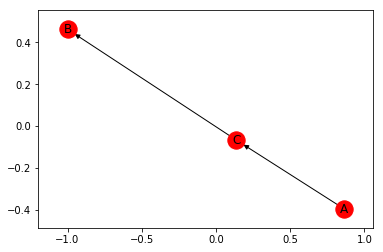

This graph shows the dependency of C on A and B on C (and therefore indirectly on A through C)


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
rvs = ['A','B','C']

G.add_nodes_from(rvs)
G.add_edges_from([('A', 'C'),('C','B')], weight=2)
nx.draw_networkx(G, arrows=True)

plt.show()
print ('This graph shows the dependency of C on A and B on C (and therefore indirectly on A through C)')


### A Trick Question in Graphs (\*) (10 pts)
Plot the graph associated with
$$
P(A,B,C,D,E) = P(A)P(C)P(B|A,C)P(D|C)P(E|D),
$$
where $A,B,C,D,E \in \{0,1\}$ with conditional probability tables
\begin{align}
P(A=1) &= 0.3 \nonumber \\
P(C=1) &= 0.7 \nonumber \\
P(B=1|A,C) &= \begin{cases} 0.3\,\mathrm{if}\,A=0,C=0\\
                          0.7\,\mathrm{if}\,A=1,C=0\\
                          0.1\,\mathrm{if}\,A=0,C=1\\
                          0.9\,\mathrm{if}\,A=1,C=1 \end{cases} \nonumber \\
P(D=1|C) &= \begin{cases}   0.4\,\mathrm{if}\,C=0\\
                          0.2\,\mathrm{if}\,C=1 \end{cases} \nonumber \\
P(E=1|D) &= \begin{cases}   0.1\,\mathrm{if}\,D=0\\
                          0.1\,\mathrm{if}\,D=1 \end{cases}. \nonumber
\end{align}
Compute the probability $P(A=1|E=1,C=1)$.  Be sure to think carefully about conditional independence before pulling out your calculator.

In [ ]:

import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
rvs = ['A','B','C','D','E']

G.add_nodes_from(rvs)
G.add_edges_from([('C','D'),('D','E'),('C','B'),('A','B')], weight=.1)
nx.draw_networkx(G, arrows=True)


plt.show()
print ('This dependecy graph shows A and C are both independent')
print ('the above graph is illustraing  --->  P(A)P(C)P(B|A,C)P(D|C)P(E|D) this dependency')

###### Answer:
The event A is not dependent on any other events  $ \dot{.\hspace{.015in}.}\hspace{.1in}$   ...  
$P(A=1|E=1,C=1)=P(A=1) = 0.3$





## 2.Gene Sequence Clustering

### 2a. Training a Markov model (40 pts)
Load the file genes\_training.p, which is available in this homework archive.  genes\_training.p contains 2000 sequences, with each sequence $\mathbf{s}$ consisting of 20 nucleobases $s_i \in \mathrm{Nu},\; \mathrm{Nu} = \{A,T,G,C\}$.  Each of these sequences is generated from one of two separate Markov processes.  The label (aka class) of the process that generated the sequence is given in the dataset. 

Learn the Markov model for each class given the training data.  **To do this, for each class compute the prior probability $\mathbf{\pi}_c$ of each nucleobase (the relative frequency of each nucleobase for each class, a vector of length 4) and the matrix of transition probabilities** 
$$
\mathcal{A}_{c,kj} = P(s_{i+1}=\mathrm{Nu}_j|s_{i}=\mathrm{Nu}_k),
$$ 
which is a 4 by 4 matrix.  As a quick sanity check, each row of $\mathcal{A}_c$ should sum to one.  **Using these priors and transition matrices, write a function that generates a new sequence given the class**, i.e. simulates a data point. 

In [18]:
import pickle
import numpy as np

# Define some useful constants
N_nucleobases = 4
N_classes = 2
nucleobases = ['A','T','G','C']

# Load the training data using pickle
sequences,labels = pickle.load(open('genes_training.p','rb'))

# Initialize the class priors and transition matrices
pi_0 = np.zeros((N_nucleobases))
pi_1 = np.zeros((N_nucleobases))

A_0 = np.zeros((N_nucleobases,N_nucleobases))
A_1 = np.zeros((N_nucleobases,N_nucleobases))
# initialize count to help aid in debugging
count0 =0
count1 =0
##### Train prior #####

# Loop over all of the sequences and labels
for s,l in zip(sequences,labels):
    sequence_length = len(s)
    #print (l)
    for p in range(sequence_length):
        if l == 0:
            pi_0[0] += s[p].count('A')
            pi_0[1] += s[p].count('T')
            pi_0[2] += s[p].count('G')
            pi_0[3] += s[p].count('C')
            count0 +=1
        if l == 1:
            pi_1[0] += s[p].count('A')
            pi_1[1] += s[p].count('T')
            pi_1[2] += s[p].count('G')
            pi_1[3] += s[p].count('C')
            count1 += 1
        #! s is a length 20 sequence of nucleobases.  For all s, count the number of times a given nucleobase 
        #!appears and record this information in the appropriate class prior (pi_0 or pi_1)
        pass
  

 # Convert from counts to probabilities by normalizing
pi_0/=pi_0.sum()
pi_1/=pi_1.sum()



##### Train transition matrix #####
for s,l in zip(sequences,labels):
    #print (s,l)
    sequence_length = len(s)
    for p in range(sequence_length-1):
        if l == 0:
            if s[p] == 'A': 
                if s[p+1] == 'A':
                    A_0[0,0] +=1
                if s[p+1] == 'T':
                    A_0[1,0] +=1
                if s[p+1] == 'G':
                    A_0[2,0] +=1
                if s[p+1] == 'C':
                    A_0[3,0] +=1
            elif s[p] == 'T':
                if s[p+1] == 'A':
                    A_0[0,1] +=1
                if s[p+1] == 'T':
                    A_0[1,1] +=1
                if s[p+1] == 'G':
                    A_0[2,1] +=1
                if s[p+1] == 'C':
                    A_0[3,1] +=1
            elif s[p] == 'G':
                if s[p+1] == 'A':
                    A_0[0,2] +=1
                if s[p+1] == 'T':
                    A_0[1,2] +=1 
                if s[p+1] == 'G':
                    A_0[2,2] +=1
                if s[p+1] == 'C':
                    A_0[3,2] +=1
            elif s[p] == 'C':
                if s[p+1] == 'A':
                    A_0[0,3] +=1
                if s[p+1] == 'T':
                    A_0[1,3] +=1
                if s[p+1] == 'G':
                    A_0[2,3] +=1
                if s[p+1] == 'C':
                    A_0[3,3] +=1
        if l == 1:
            if s[p] == 'A': 
                if s[p+1] == 'A':
                    A_1[0,0] +=1
                if s[p+1] == 'T':
                    A_1[1,0] +=1
                if s[p+1] == 'G':
                    A_1[2,0] +=1
                if s[p+1] == 'C':
                    A_1[3,0] +=1
            elif s[p] == 'T':
                if s[p+1] == 'A':
                    A_1[0,1] +=1
                if s[p+1] == 'T':
                    A_1[1,1] +=1
                if s[p+1] == 'G':
                    A_1[2,1] +=1
                if s[p+1] == 'C':
                    A_1[3,1] +=1
            elif s[p] == 'G':
                if s[p+1] == 'A':
                    A_1[0,2] +=1
                if s[p+1] == 'T':
                    A_1[1,2] +=1 
                if s[p+1] == 'G':
                    A_1[2,2] +=1
                if s[p+1] == 'C':
                    A_1[3,2] +=1
            elif s[p] == 'C':
                if s[p+1] == 'A':
                    A_1[0,3] +=1
                if s[p+1] == 'T':
                    A_1[1,3] +=1
                if s[p+1] == 'G':
                    A_1[2,3] +=1
                if s[p+1] == 'C':
                    A_1[3,3] +=1    
        #! s is a length 20 sequence of nucleoboases, for all s, count the number of times that a nucleobase 
        #! transitions to another nucleobase and record this information in the appropriate transition matrix (A_0 or A_1)
        pass
    
# Convert from counts to probabilities by row normalization
A_0/=A_0.sum(axis=0)[np.newaxis,:] # had to switch axis from 1 to 0 and np.newaxis to row because of how I
A_1/=A_1.sum(axis=0)[np.newaxis,:] # defined my transition matrix above. A--> T not necessarily == T --> A

#print (A_0)
#print (A_1)
#print(A_0.sum(axis=0))#[np.newaxis,:])
#print(A_1.sum(axis=0)[:,np.newaxis])
#print (1211+1704+2284+141)
#print(1211+1023+2652+459)
#print (1023+895+1325+1789)
count = 0
for i in range(4):   #check to see if each column adds up to one.
    if (np.sum(A_0[:,i])) == 1:
        count += 1  
    if i == 3 and count == 4:
        print ('All columns of class 0 transition matrix added to one.')
        
count = 0
for i in range(4):   #check to see if each column adds up to one.
    if (np.sum(A_1[:,i])) >.999999 and (np.sum(A_1[:,i])) < 1.000001:
        count += 1 
        
    if i == 3 and count == 4:
        print ('All columns of class 1 transition matrix added to one.')
        


All columns of class 0 transition matrix added to one.
All columns of class 1 transition matrix added to one.


###### Notes
    As a quick sanity check columns in my transition matrix (rows in how Doug formulated the problem & therefore my A.T should equal doug's A) should sum to one (adding values in the same column together, 'across all rows'). Similarly the prior probability array should also sum to one. 

In [ ]:
##### Generate a synthetic sequence #####
def generate_new_sequence(A,pi,n=20):
    """  
    Arguments:
    A -> Nucleobase transition matrix
    pi -> Prior
    n -> length of sequence to generate
    """
    
    for i in range(n):
    # Draw from the prior for the first nucleobase
        if i == 0:
            s=[]
            s.append(np.random.choice(nucleobases,p=pi))
        else:    
            if s[i-1] == 'A':
                #print ('A')
                s.append(np.random.choice(nucleobases,p=A[:,0]))
            if s[i-1] == 'T':
                #print ('T')
                s.append(np.random.choice(nucleobases,p=A[:,1]))
            if s[i-1] == 'G':
                #print ('G')
                s.append(np.random.choice(nucleobases,p=A[:,2]))
            if s[i-1] == 'C':
                #print ('C')
                s.append(np.random.choice(nucleobases,p=A[:,3]))
    #! Write the code that uses the transition matrix to produce a length n sample
    return s

seq_0=generate_new_sequence(A_0,pi_0)
seq_1=generate_new_sequence(A_1,pi_1)



print ('The prior probabilities P(A),P(T),P(G),P(C) used to generate the first nucleobase:')
print ('priors in label 0:' + str(pi_0))
print ('priors in label 1:' + str(pi_1))
print ()
print()
print ('Transition Matrix for class 0: Columns and rows A, T, G, C, respectively')
print (A_0)
print ()
print ('Transition Matrix for class 1: A,T,G,C')
print (A_1)
print()
print ('First order Markov Model Generated Sequences from prior and transition probabilites:')
print ('label 0:' + str(seq_0))
print ('label 1:' +str(seq_1))


### 2b. A Markov classifier (*) (20 pts)


Having the prior and transition probabilities gives you the ability to evaluate the likelihood of a sequence for a given class as:
$$
P(\mathbf{s}) = P(s_1|\mathbf{\pi}_c) \prod_{i=1}^{n-1} P(s_{i+1}|s_{i},\mathcal{A}_c),
$$
where $\mathbf{\pi}_c$ is the class-conditioned prior probability, and $\mathcal{A}_c$ is the class-conditioned transition matrix.  Comparing the computed likelihood for a given sequence between different classes forms the basis of a classifier in a very similar manner to naive Bayes.  The difference this time is that now each random variable depends on the one before it in the sequence, whereas in naive Bayes we assumed that all the random variables were independent.    

Load the file genes\_test.p, which is similar to genes\_training.p.  **For each sequence, compute the likelihood for both classes and assign a label.  Compare this predicted label to the known one, and report the test set accuracy**.  As a point of comparison, my implementation achieved 98.7% accuracy.  

In [21]:
# LOAD DATA
sequences_test,labels_test = pickle.load(open('genes_test.p','rb'))


def probability_of_sequence_conditioned_onlabel(A,pi):
    """function that takes a list of sequences and computes probability of each individual sequence (s) 
       by multiplying the prior|class by each transition probability, e.g. A-->G transition probability 
       times G-->T probability etc."""
    P_array = [] # initialize an empty list then turn into an array.
    P_array = np.array(, dtype = np.float64)
    count = 0
    for s in sequences_test:
        for i in range(len(s)):
        
            if i == 0:
                P = 1 
                if s[0] == 'A':
                    P *= pi[0]
                elif s[0] == 'T':
                    P *= pi[1]
                elif s[0] == 'G':
                    P *= pi[2]
                elif s[0] == 'C':
                    P *= pi[3]
                #print(len(s))
                #print (P)
            
            else:
                #print (i)
                if s[i-1]== 'A' and s[i] == 'A':
                    P *= A[0,0]
                    #print (P)
                if s[i-1]== 'A' and s[i] == 'T':
                    P *= A[1,0]
                if s[i-1]== 'A' and s[i] == 'G':
                    P *= A[2,0]
                if s[i-1]== 'A' and s[i] == 'C':
                    P *= A[3,0]
                if s[i-1]== 'T':
                    if s[i]== 'A':
                        P *= A[0,1]
                    if s[i]== 'T':
                        P *= A[1,1]
                    if s[i]== 'G':
                        P *= A[2,1]
                    if s[i]== 'C':
                        P *= A[3,1]   
                if s[i-1]== 'G':
                    if s[i]== 'A':
                        P *= A[0,2]
                    if s[i]== 'T':
                        P *= A[1,2]
                    if s[i]== 'G':
                        
                        P *= A[2,2]
                    if s[i]== 'C':
                        P *= A[3,2]
                if s[i-1]== 'T':
                    if s[i]== 'A':
                        P *= A[0,3]
                    if s[i]== 'T':
                        P *= A[1,3]
                    if s[i]== 'G':
                        P *= A[2,3]
                    if s[i]== 'C':
                        P *= A[3,3] 
                if i == len(s)-1:
                    #print (len(s)-1)
                    P_array=np.append(P_array,P) # append the P scalar for specific sequence onto an array of such values corresponding
                    count +=1         # to P of specific seqences with indices corresponding to indicies of s's in seuqence_test
                    
                                         
    return P_array

#print (P_0.dtype())
#print (len(sequences_test))
#print (count)
#print (P)
Sequence_Probability_0 = probability_of_sequence_conditioned_onlabel(A_0,pi_0)
#print (Sequence_Probability_0)

Sequence_Probability_1 = probability_of_sequence_conditioned_onlabel(A_1,pi_1)
#print (Sequence_Probability_1.size)

Ratio_Pgiven0_to_Pgiven1 = Sequence_Probability_0/Sequence_Probability_1

#print (Ratio_Pgiven0_to_Pgiven1)

# Caclulating Accuracy by dividing the P given 0 by the P given 1 for each sequence. 
# if larger than 1 that means there was a larger P of label 0 
predicted_label=[]
for i in range(len(Ratio_Pgiven0_to_Pgiven1)):
    if Ratio_Pgiven0_to_Pgiven1[i] >= 1.:
        predicted_label.append(1.)
    else:
        predicted_label.append(0.)

count = 0 
for i in range(len(predicted_label)):
    if predicted_label[i]!=labels_test[i]:
        count += 1

Accuracy = count/(len(predicted_label))        

print ('The percent accuracy of predicitng which class/label the test sequences came from is: ' + str(100*Accuracy) + '%')

IndexError: list index out of range

In [ ]:
# Calculating accuracy via the log ratio method:

log_ratio_P = np.log(Sequence_Probability_0)-np.log(Sequence_Probability_1)


predicted_label =[]
for i in range(len(Sequence_Probability_0)):
    if log_ratio_P[i] > 0:
        predicted_label.append(0)
    else:
        predicted_label.append(1)
count = 0
for i in range(len(predicted_label)):
    if predicted_label[i]==labels_test[i]:
        count +=1
    #else:
        #print (i)  #figuring out where I mispredicted. 
        

print ('Percent accuracy: ' + str(100*count/len(predicted_label)))
print ('Using the log ratio gave me the same accuracy.')

###### Notes
I achieved a naively high accuracy (92.5%) if you compare to this to what I could have achieved with priors only. Sense my priors weren't all that different from one another, therefore I have gained information. The key ingredient here is the transition probailities. And if a transition is 2 times as likely in class 0 vs class 1 and the next transition is 2 times as likely in class 0 vs class 1, after multiplying them we have class 0 being 4 times as likely. In this way small differences in transition probabilities can multiply up and become relatively large differnces after a sufficient number of transitions has been analyzed. Of course, this is dependent on there being discernible differences between the transition probabilities of the differing classes and having enough data to detect these differences, both with training data and test data. 

However, my accuracy is 7 times lower than Doug's reported ~99%. We should have the exact same accuracy sense we are training and testing on the same data and are using the same first order markov type model. Therefore, this is relatively a poor performance. Possible reasons: rounding/truncating small probabilities?, , , . 

In [23]:

print (len(sequences_test))

1000
